## Roll No   : P22-9278
## Name      : Muhammad Shafeen
## Lab Task  : 11

### Importing Librarires

In [9]:
import numpy as np
import pandas as pd # for dealing with dataframes
from tensorflow.keras import Sequential # for creating a sequential model
from tensorflow.keras.layers import Dense # for creating layers in the model
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
from sklearn.preprocessing import StandardScaler, OneHotEncoder # for preprocessing
from sklearn.impute import SimpleImputer # for preprocessing
from sklearn.compose import ColumnTransformer # for preprocessing
from sklearn.pipeline import Pipeline # for preprocessing
from sklearn.model_selection import train_test_split # for splitting the dataset
from sklearn.neural_network import MLPClassifier

### Reading Dataset

In [10]:
path="titanic.csv"
df=pd.read_csv(path)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Checking Null values

In [11]:
df.isnull().sum()
# df=df.ffill()
df.isnull().sum()
# df=df.dropna()
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:

# sex_data = df["Sex"].values.reshape(-1, 1)

# encoder = OneHotEncoder()

# one_hot_encoded = encoder.fit_transform(sex_data).toarray()

# print(one_hot_encoded)


### Dropping columns that we donot need 

In [13]:
# one_hot_encoded_df = pd.DataFrame(one_hot_encoded)
# df["Sex"]=one_hot_encoded_df[0]
df=df.drop(columns=["Name","Ticket","Cabin","Embarked","SibSp","Parch"]).copy()
df

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,male,22.0,7.2500
1,2,1,1,female,38.0,71.2833
2,3,1,3,female,26.0,7.9250
3,4,1,1,female,35.0,53.1000
4,5,0,3,male,35.0,8.0500
...,...,...,...,...,...,...
886,887,0,2,male,27.0,13.0000
887,888,1,1,female,19.0,30.0000
888,889,0,3,female,NaN,23.4500
889,890,1,1,male,26.0,30.0000


### Plotting before normalization

/home/shafeenkhan/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/shafeenkhan/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


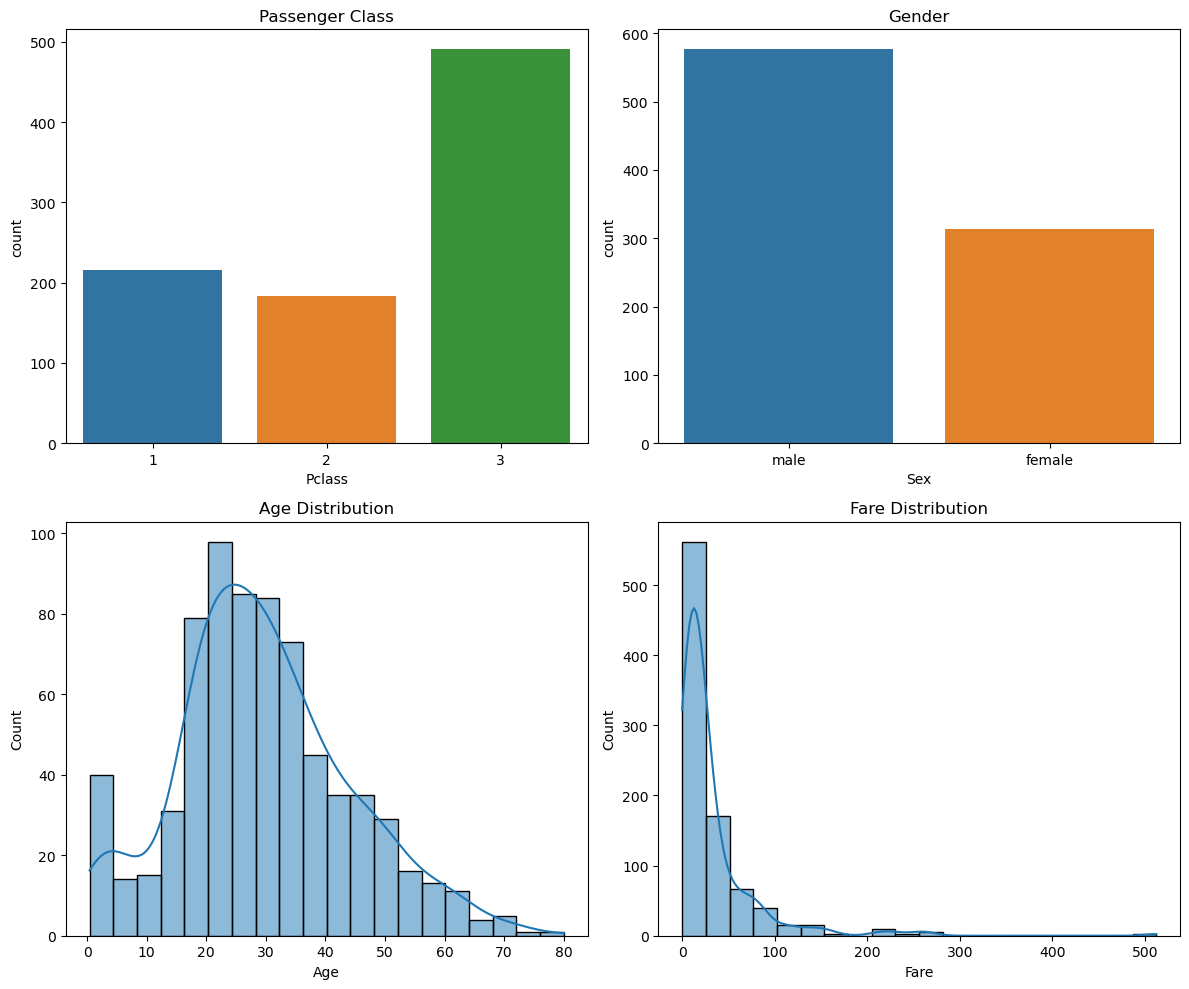

In [14]:

# Set up the figure grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot Pclass
sns.countplot(x='Pclass', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Passenger Class')

# Plot Sex
sns.countplot(x='Sex', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Gender')

# Plot Age distribution
sns.histplot(data=df, x='Age', bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Age Distribution')

# Plot Fare distribution
sns.histplot(data=df, x='Fare', bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Fare Distribution')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


In [15]:
df

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,male,22.0,7.2500
1,2,1,1,female,38.0,71.2833
2,3,1,3,female,26.0,7.9250
3,4,1,1,female,35.0,53.1000
4,5,0,3,male,35.0,8.0500
...,...,...,...,...,...,...
886,887,0,2,male,27.0,13.0000
887,888,1,1,female,19.0,30.0000
888,889,0,3,female,NaN,23.4500
889,890,1,1,male,26.0,30.0000


### Normalization of the data

In [16]:

data = df[['Age', 'Fare', 'Pclass', 'Sex', 'Survived']].copy()

# Define preprocessing steps
numeric_features = [0, 1]  # Indices of numerical columns in data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Fill missing values with median
    ('scaler', StandardScaler())  # Scale data
])

categorical_features = [2, 3]  # Indices of categorical columns in data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Fill missing values with 'missing'
    ('onehot', OneHotEncoder())  # One-hot encode categorical variables
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing
X = preprocessor.fit_transform(data.drop(columns=['Survived']))
y = data['Survived']


### Plotting After Normalization

/home/shafeenkhan/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/shafeenkhan/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


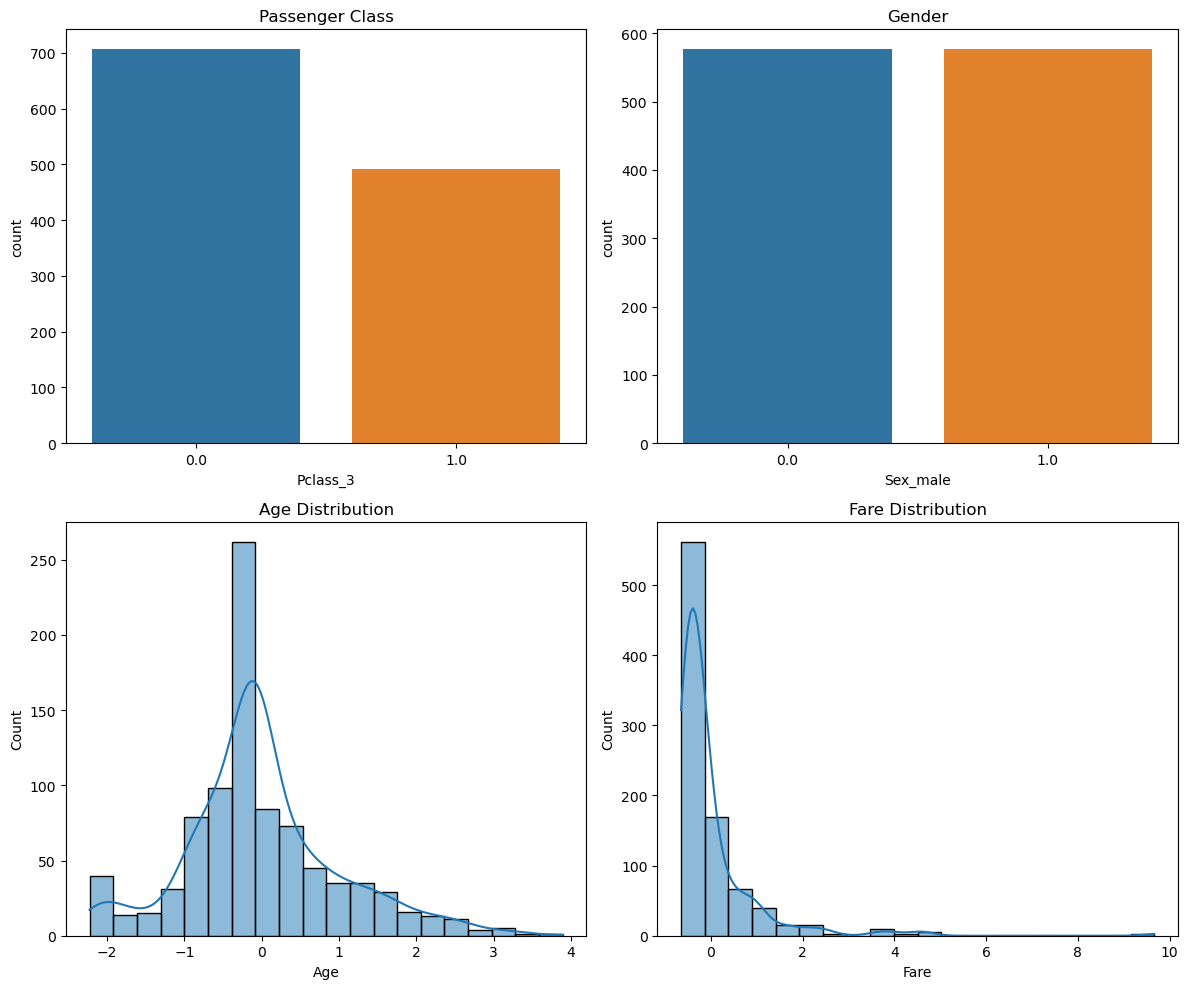

In [17]:
X_df = pd.DataFrame(X, columns=['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male'])

# Set up the figure grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot Pclass
sns.countplot(x='Pclass_1', data=X_df, ax=axes[0, 0])
sns.countplot(x='Pclass_2', data=X_df, ax=axes[0, 0])
sns.countplot(x='Pclass_3', data=X_df, ax=axes[0, 0])
axes[0, 0].set_title('Passenger Class')

# Plot Sex
sns.countplot(x='Sex_female', data=X_df, ax=axes[0, 1])
sns.countplot(x='Sex_male', data=X_df, ax=axes[0, 1])
axes[0, 1].set_title('Gender')

# Plot Age distribution
sns.histplot(data=X_df, x='Age', bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Age Distribution')

# Plot Fare distribution
sns.histplot(data=X_df, x='Fare', bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Fare Distribution')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

### Splitting data testing and training 

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

### Training Models on different architecture

### WITH KERAS

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape

(712, 7)

In [ ]:
models = [
    Sequential([ # Model 1 with 1 hidden layers
        Dense(32, activation='relu', input_shape=(7,)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ],name="Sequential_Titanic_model_1"),
    Sequential([ # Model 2 with 2 hidden layers
        Dense(64, activation='relu', input_shape=(7,)),
        Dense(100, activation='relu'),
        Dense(100, activation='relu'),
        Dense(1, activation='sigmoid')
    ],name="Sequential_Titanic_model_2"),
    Sequential([ # Model 3 with many hidden layers and more neurons
        Dense(10, activation='relu', input_shape=(7,)),
        Dense(20, activation='relu'),
        Dense(30, activation='relu'),
        Dense(40, activation='relu'),
        Dense(50, activation='relu'),
        Dense(60, activation='relu'),
        Dense(70, activation='relu'),
        Dense(80, activation='relu'),
        Dense(90, activation='relu'),
        Dense(1, activation='sigmoid')
    ],name="Sequential_Titanic_model_3"),
    Sequential([ # Model 4 with one hidden layer and many units
        Dense(100, activation='relu', input_shape=(7,)),
        Dense(1, activation='sigmoid')
    ],name="Sequential_Titanic_model_4"),
    # Sequential([
    #     Dense(3, activation='relu', input_shape=(7,)),
    #     Dense(4, activation='relu'),
    #     Dense(1, activation='sigmoid')
    # ],name="Sequential_Titanic_model_5"),
    # Sequential([
    #     Dense(9, activation='relu', input_shape=(7,)),
    #     Dense(8, activation='relu'),
    #     Dense(5, activation='relu'),
    #     Dense(1, activation='sigmoid')
    # ],name="Sequential_Titanic_model_6"),
    # Sequential([
    #     Dense(0.2,activation='relu',input_shape=(7,)),
    #     Dense(0.5,activation='relu'),
    #     Dense(0.4,activation='relu'),
    #     Dense(0.5,activation='relu'),
    #     Dense(0.01,activation='relu'),
    #     Dense(0.05,activation='relu'),
    #     Dense(1,activation='sigmoid'),],name="Sequential_Titanic_model_7"),
]

# Compiling and  training models
histories = []
for model in models:
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    print(model.layers)
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
    histories.append(history)



In [23]:
histories

In [ ]:
# Extracting accuracies
val_accuracies = []

for history in histories:
    val_accuracy = history.history['val_accuracy'][-1]
    val_accuracies.append(val_accuracy)
# Plotting
plt.figure(figsize=(10, 6))

colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightseagreen']

for i, acc in enumerate(val_accuracies):
    plt.bar(i, acc, color=colors[i])

plt.xticks(np.arange(len(models)), ['Model 1', 'Model 2', 'Model 3', 'Model 4'])
plt.xlabel('Different Model Architecture')
plt.ylabel('Accuracy')
plt.title('Comparison of Different Neural Network Architectures')
plt.ylim([0, 1])
plt.show()

### WITH SKLEARN

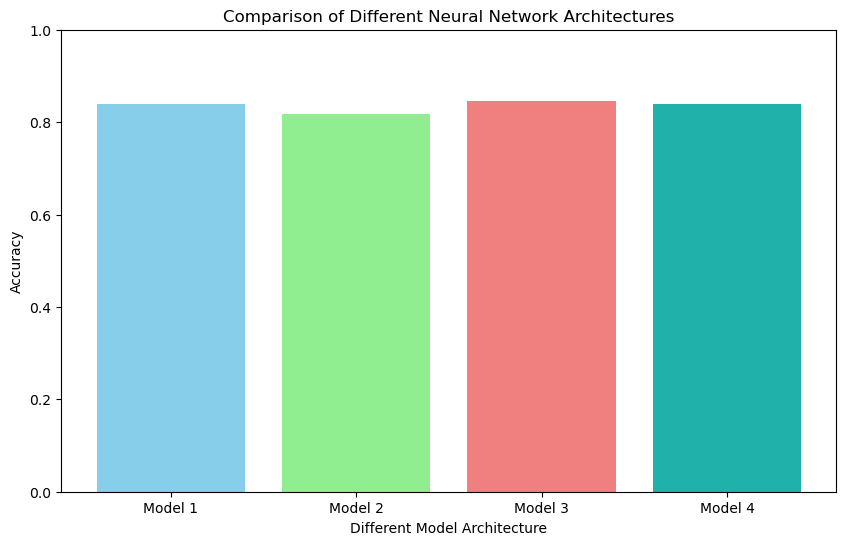

In [22]:

models = [
    MLPClassifier(hidden_layer_sizes=(32,), activation='relu', max_iter=100),
    MLPClassifier(hidden_layer_sizes=(64, 100, 100), activation='relu', max_iter=100),
    MLPClassifier(hidden_layer_sizes=(10, 20, 30, 40, 50, 60, 70, 80, 90), activation='relu', max_iter=100),
    MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=100)
]
plt.figure(figsize=(10, 6))

# Define colors for bars
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightseagreen']

for i, history in enumerate(histories):
    val_accuracy = history.history['val_accuracy'][-1]
    plt.bar(i, val_accuracy, color=colors[i])

plt.xticks(np.arange(len(models)), ['Model 1', 'Model 2', 'Model 3', 'Model 4'])
plt.xlabel('Different Model Architecture')
plt.ylabel('Accuracy')
plt.title('Comparison of Different Neural Network Architectures')
plt.ylim([0, 1])
plt.show()

